## Data exploration notebook

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy

In [7]:
# Loading data 

df=pd.read_csv("ICU_Challenge_dataset.csv", sep=",")
df

recordid  SAPS-I  SOFA  In-hospital_death   Age  Gender  Height  Weight  \
0       132539       6     1                  0  54.0     0.0     NaN     NaN   
1       132540      16     8                  0  76.0     1.0   175.3    76.0   
2       132541      21    11                  0  44.0     0.0     NaN    56.7   
3       132543       7     1                  0  68.0     1.0   180.3    84.6   
4       132545      17     2                  0  88.0     0.0     NaN     NaN   
...        ...     ...   ...                ...   ...     ...     ...     ...   
5995    151939      19     6                  1  52.0     1.0     NaN    80.0   
5996    151383      13     2                  0  90.0     0.0   157.5    72.0   
5997    149623      12     9                  0  72.0     0.0     NaN   185.0   
5998    145366      18    11                  1  52.0     1.0   182.9    95.9   
5999    146804      19     9                  0  55.0     1.0   177.8    81.7   

      CCU  CSRU  ...  Platelets_last  TroponinI_last  TroponinT_last  \
0       0     0  ...           185.0             NaN             NaN   
1       0     1  ...           135.0             NaN             NaN   
2       0     0  ...           113.0             NaN             NaN   
3       0     0  ...           284.0             NaN             NaN   
4       0     0  ...            97.0             NaN             NaN   
...   ...   ...  ...             ...             ...             ...   
5995    0     0  ...           221.0             NaN             NaN   
5996    1     0  ...           305.0             NaN             NaN   
5997    1     0  ...           167.0             NaN            0.02   
5998    0     0  ...            28.0             NaN             NaN   
5999    0     1  ...           157.0             NaN             NaN   

      WBC_last  Weight_last  pH_last  MechVentStartTime  MechVentDuration  \
0          9.4          NaN      NaN                NaN               NaN   
1         13.3         81.6     7.37               71.0             360.0   
2          6.2         56.7     7.47              617.0            2160.0   
3          7.9         84.6      NaN                NaN               NaN   
4          4.8          NaN      NaN                NaN               NaN   
...        ...          ...      ...                ...               ...   
5995      11.5          NaN     7.46              238.0            2440.0   
5996      12.1         68.5      NaN                NaN               NaN   
5997      12.7          NaN     7.39              188.0            1200.0   
5998       5.8         96.2     7.36              100.0            2760.0   
5999      13.3         98.6     7.41              332.0             960.0   

      MechVentLast8Hour  UrineOutputSum  
0                   NaN             NaN  
1                   0.0             5.0  
2                   1.0            14.0  
3                   NaN             NaN  
4                   NaN             NaN  
...                 ...             ...  
5995                1.0            17.0  
5996                NaN             NaN  
5997                0.0            10.0  
5998                1.0            27.0  
5999                0.0             7.0  

[6000 rows x 121 columns]

In [8]:
# Settings 
DOWNSAMPLING=False
DROPPING_MISSING_DATA=30

In [9]:
# Downsampling
# separare in righe per target
if DOWNSAMPLING: 
    t0=df[df['In-hospital_death']==0]
    t1=df[df['In-hospital_death']==1]
    print("t0 e t1: ", len(t0), len(t1))

In [10]:
# Missing data exploration 

# print(df[df.columns[df.isna().any()]])
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df)
#print(df[df.columns[df.isna().any()]].isna().sum())

                         column_name  percent_missing
recordid                    recordid         0.000000
SAPS-I                        SAPS-I         0.000000
SOFA                            SOFA         0.000000
In-hospital_death  In-hospital_death         0.000000
Age                              Age         0.000000
...                              ...              ...
TroponinT_first      TroponinT_first        77.766667
Cholesterol_last    Cholesterol_last        92.133333
Cholesterol_first  Cholesterol_first        92.133333
TroponinI_last        TroponinI_last        95.250000
TroponinI_first      TroponinI_first        95.250000

[121 rows x 2 columns]


In [11]:
# Dropping data with missing percentage > DROPPING_MISSING_DATA value and dropping record ID

df_col_keep = missing_value_df[missing_value_df['percent_missing']<DROPPING_MISSING_DATA]
df_col = df_col_keep['column_name']

df=df[df_col]
df.drop(['recordid'], axis=1,inplace=True)
df

/var/folders/km/52y7gmdx3n16d72qd0p8w3b00000gn/T/ipykernel_27863/1427621624.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['recordid'], axis=1,inplace=True)


SAPS-I  SOFA  In-hospital_death   Age  CCU  CSRU  SICU  Gender  \
0          6     1                  0  54.0    0     0     1     0.0   
1         16     8                  0  76.0    0     1     0     1.0   
2         21    11                  0  44.0    0     0     0     0.0   
3          7     1                  0  68.0    0     0     0     1.0   
4         17     2                  0  88.0    0     0     0     0.0   
...      ...   ...                ...   ...  ...   ...   ...     ...   
5995      19     6                  1  52.0    0     0     1     1.0   
5996      13     2                  0  90.0    1     0     0     0.0   
5997      12     9                  0  72.0    1     0     0     0.0   
5998      18    11                  1  52.0    0     0     0     1.0   
5999      19     9                  0  55.0    0     1     0     1.0   

      BUN_first  Creatinine_last  ...  NIDiasABP_first  NIMAP_highest  \
0          13.0              0.7  ...             65.0          92.33   
1          16.0              1.3  ...             38.0          88.33   
2           8.0              0.3  ...             84.0         110.00   
3          23.0              0.7  ...             63.0         100.70   
4          45.0              1.0  ...             41.0         105.70   
...         ...              ...  ...              ...            ...   
5995       11.0              0.6  ...              NaN            NaN   
5996       20.0              0.7  ...             80.0         117.30   
5997       62.0              2.8  ...             63.0         100.30   
5998       16.0              1.0  ...             74.0          92.00   
5999       14.0              1.3  ...             43.0          68.67   

      NIDiasABP_highest  NIDiasABP_last  pH_last  pH_first  PaCO2_first  \
0                  67.0            55.0      NaN       NaN          NaN   
1                  67.0            49.0     7.37      7.45         34.0   
2                  95.0            84.0     7.47      7.51         37.0   
3                  81.0            81.0      NaN       NaN          NaN   
4                  96.0            42.0      NaN       NaN          NaN   
...                 ...             ...      ...       ...          ...   
5995                NaN             NaN     7.46      7.43         37.0   
5996              100.0            75.0      NaN       NaN          NaN   
5997               74.0            51.0     7.39      7.27         89.0   
5998               74.0            44.0     7.36      7.30         33.0   
5999               43.0            43.0     7.41      7.30         51.0   

      PaCO2_last  PaO2_last  PaO2_first  
0            NaN        NaN         NaN  
1           46.0      140.0       344.0  
2           37.0      173.0        65.0  
3            NaN        NaN         NaN  
4            NaN        NaN         NaN  
...          ...        ...         ...  
5995        32.0      119.0       368.0  
5996         NaN        NaN         NaN  
5997        65.0       93.0        50.0  
5998        42.0       86.0        94.0  
5999        38.0       78.0       377.0  

[6000 rows x 68 columns]

(array([5162.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         838.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

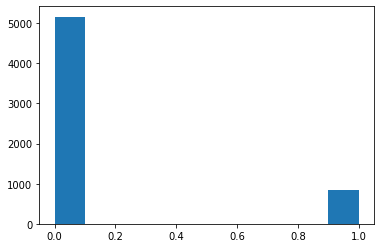

In [12]:
# Unbalanced output target 

df['In-hospital_death'].unique()
fig, ax = plt.subplots()
ax.hist(df['In-hospital_death'])


In [13]:
# Subdivision in categorical and numerical variables
# Variable type categorical / numerical
# All categorical variables are binary categories

print(np.unique(df.dtypes))

int_var = list(df.columns[df.dtypes == np.int64])
float_var = list(df.columns[df.dtypes == np.float64])

cat_var = []
num_var = []
for cat in list(df.columns):
    if len(df[cat].unique()) <=3: #conta anche i Nan come valori
        cat_var.append(cat)
    else:
        num_var.append(cat)

categorical_df = df[cat_var]
numerical_df = df[num_var]



[dtype('int64') dtype('float64')]


<function matplotlib.pyplot.show(close=None, block=None)>

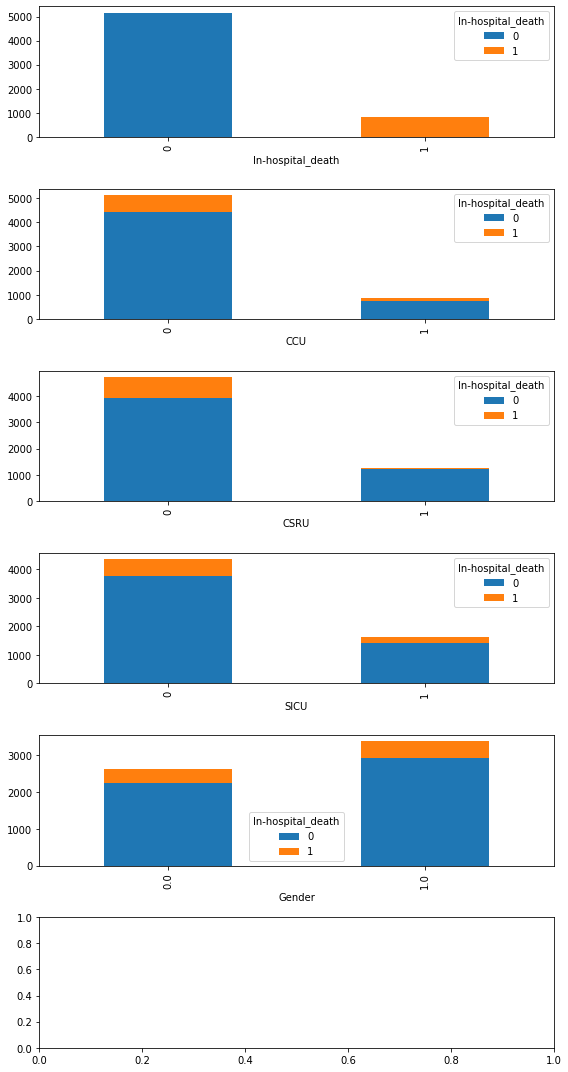

In [14]:
# Bivariate analysis of categorical variables:
# Who is CSRU for example is very unlikely to die 
# Opposite for who had mechanical ventilation within the last 8 hours
# The gender variable has quite a balanced subdivision, so it is probably not so relevant 

fig, ax = plt.subplots(nrows=6)
for c, col in enumerate(list(categorical_df.columns)): 
    clarity_color_table = pd.crosstab(index=categorical_df[col], 
                              columns=categorical_df["In-hospital_death"])

    clarity_color_table.plot(kind="bar", 
                     figsize=(8,15),
                     stacked=True, ax=ax[c], xlabel=col)
fig.tight_layout()
plt.show

In [15]:
categorical_df.columns

Index(['In-hospital_death', 'CCU', 'CSRU', 'SICU', 'Gender'], dtype='object')

## Numerical analysis

In [16]:
numerical_df


SAPS-I  SOFA   Age  BUN_first  Creatinine_last  BUN_last  \
0          6     1  54.0       13.0              0.7       8.0   
1         16     8  76.0       16.0              1.3      21.0   
2         21    11  44.0        8.0              0.3       3.0   
3          7     1  68.0       23.0              0.7      10.0   
4         17     2  88.0       45.0              1.0      25.0   
...      ...   ...   ...        ...              ...       ...   
5995      19     6  52.0       11.0              0.6       9.0   
5996      13     2  90.0       20.0              0.7      23.0   
5997      12     9  72.0       62.0              2.8      67.0   
5998      18    11  52.0       16.0              1.0      25.0   
5999      19     9  55.0       14.0              1.3      23.0   

      Creatinine_first  HCT_first  HCT_last  HR_first  ...  NIDiasABP_first  \
0                  0.8       33.7      30.3      73.0  ...             65.0   
1                  0.8       24.7      29.4      88.0  ...             38.0   
2                  0.4       28.5      29.4     100.0  ...             84.0   
3                  0.9       41.3      36.3      79.0  ...             63.0   
4                  1.0       22.6      30.9      93.0  ...             41.0   
...                ...        ...       ...       ...  ...              ...   
5995               0.6       30.3      26.8      68.0  ...              NaN   
5996               0.7       26.0      32.0      88.0  ...             80.0   
5997               2.6       34.9      32.0     103.0  ...             63.0   
5998               1.1       18.0      24.7     143.0  ...             74.0   
5999               0.9       20.0      28.9      95.0  ...             43.0   

      NIMAP_highest  NIDiasABP_highest  NIDiasABP_last  pH_last  pH_first  \
0             92.33               67.0            55.0      NaN       NaN   
1             88.33               67.0            49.0     7.37      7.45   
2            110.00               95.0            84.0     7.47      7.51   
3            100.70               81.0            81.0      NaN       NaN   
4            105.70               96.0            42.0      NaN       NaN   
...             ...                ...             ...      ...       ...   
5995            NaN                NaN             NaN     7.46      7.43   
5996         117.30              100.0            75.0      NaN       NaN   
5997         100.30               74.0            51.0     7.39      7.27   
5998          92.00               74.0            44.0     7.36      7.30   
5999          68.67               43.0            43.0     7.41      7.30   

      PaCO2_first  PaCO2_last  PaO2_last  PaO2_first  
0             NaN         NaN        NaN         NaN  
1            34.0        46.0      140.0       344.0  
2            37.0        37.0      173.0        65.0  
3             NaN         NaN        NaN         NaN  
4             NaN         NaN        NaN         NaN  
...           ...         ...        ...         ...  
5995         37.0        32.0      119.0       368.0  
5996          NaN         NaN        NaN         NaN  
5997         89.0        65.0       93.0        50.0  
5998         33.0        42.0       86.0        94.0  
5999         51.0        38.0       78.0       377.0  

[6000 rows x 63 columns]

<AxesSubplot:>

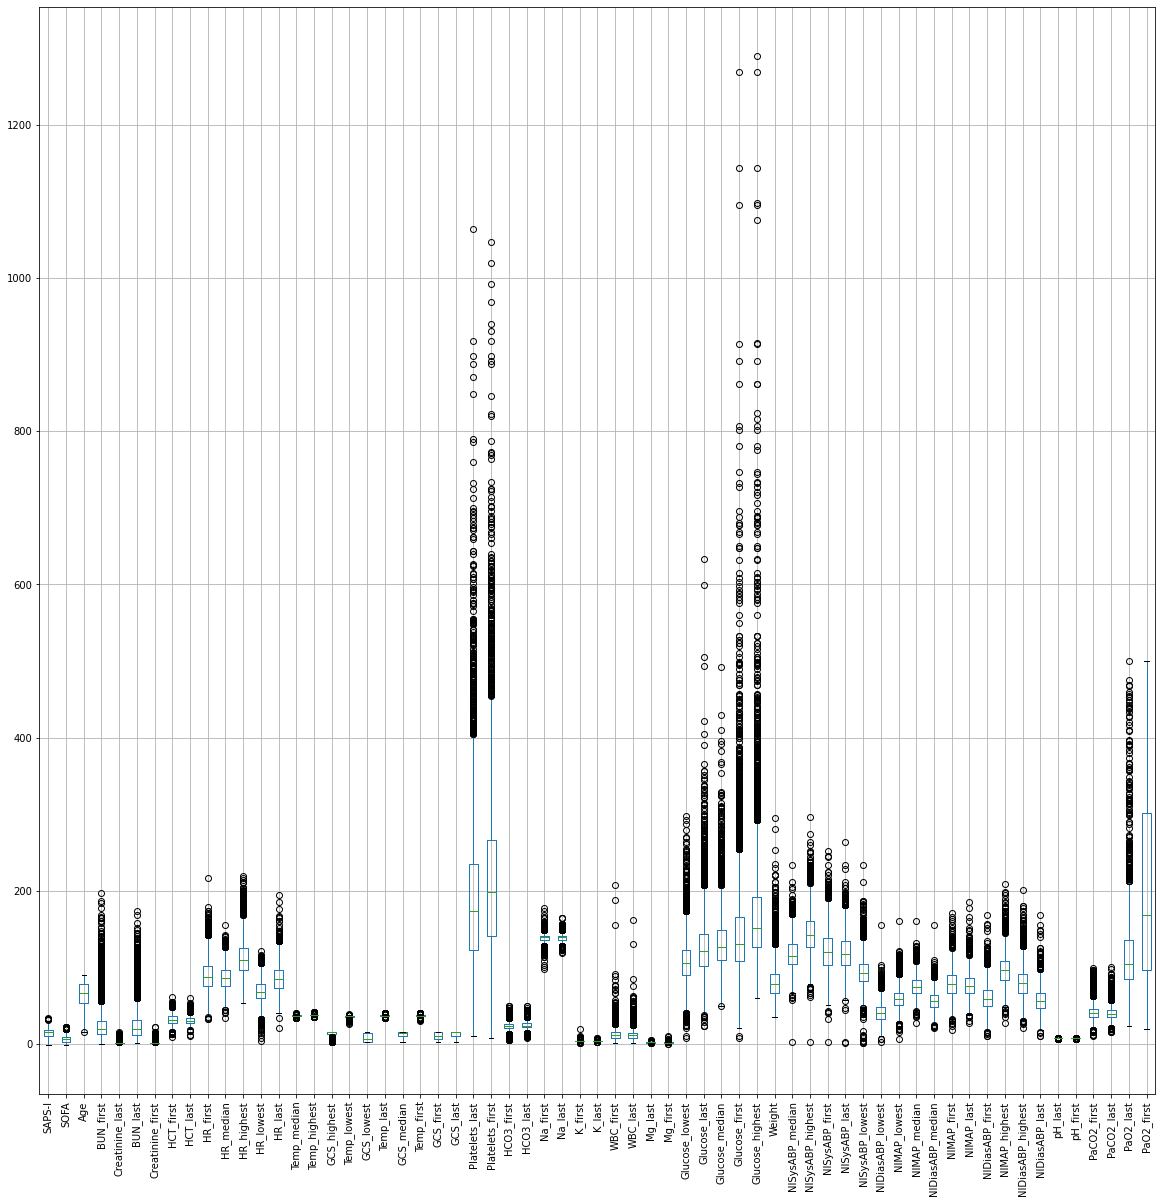

In [17]:
# Plotting numerical variables distributions 

fig, ax = plt.subplots(figsize=(20,20))
numerical_df.boxplot(ax=ax, rot=90)


In [18]:
# Dividing numerical variables that have a matched pair first/last
col_first = []
col_last = []
col_single = []
for x in list(numerical_df.columns): 
    if 'first' in x: 
        col_first.append(x)
    elif 'last' in x: 
        col_last.append(x)
    else: 
        col_single.append(x)
col_first.sort()
col_last.sort()
print(col_first)
print(col_last)
print(len(col_first))


print(df[col_first].shape)
df_first_last = pd.concat([df[col_first], df[col_last]], axis=1)
df_numerical_single = df[col_single]

['BUN_first', 'Creatinine_first', 'GCS_first', 'Glucose_first', 'HCO3_first', 'HCT_first', 'HR_first', 'K_first', 'Mg_first', 'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first', 'Na_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first', 'Temp_first', 'WBC_first', 'pH_first']
['BUN_last', 'Creatinine_last', 'GCS_last', 'Glucose_last', 'HCO3_last', 'HCT_last', 'HR_last', 'K_last', 'Mg_last', 'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'Na_last', 'PaCO2_last', 'PaO2_last', 'Platelets_last', 'Temp_last', 'WBC_last', 'pH_last']
19
(6000, 19)


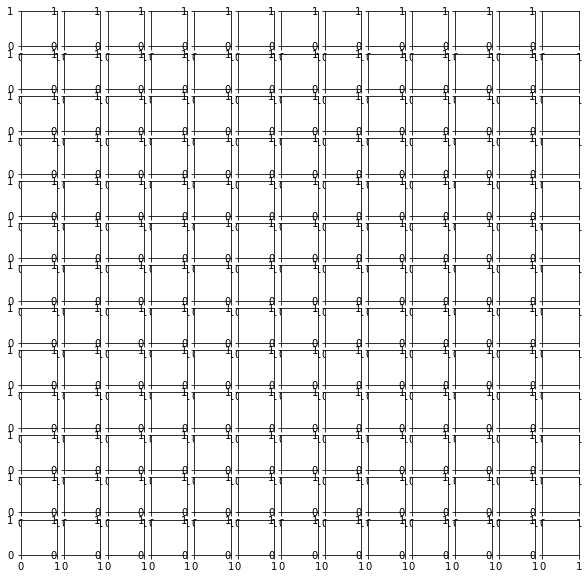

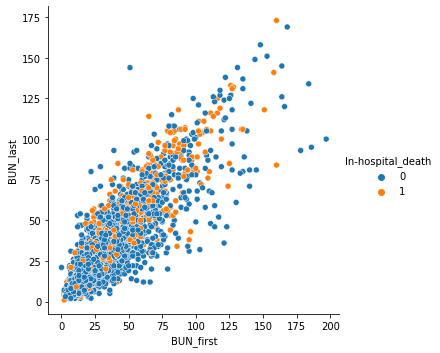

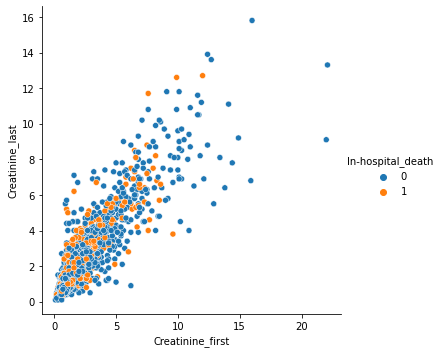

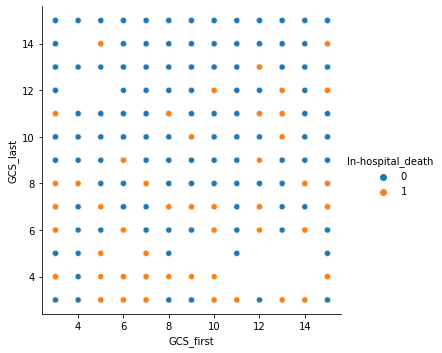

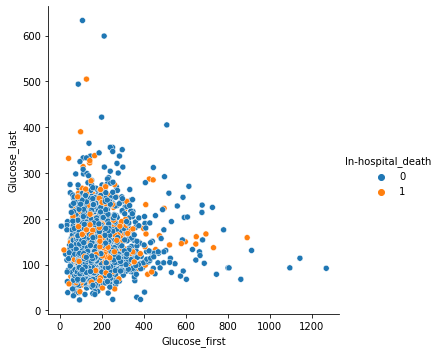

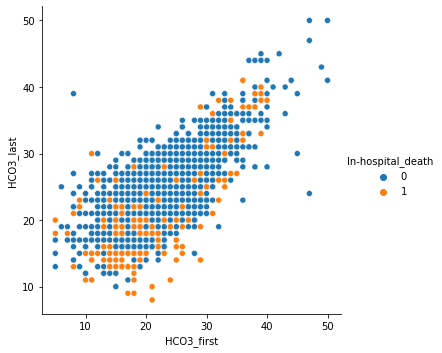

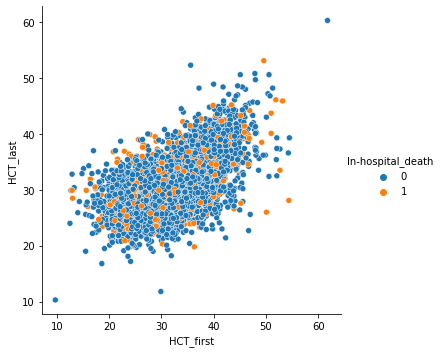

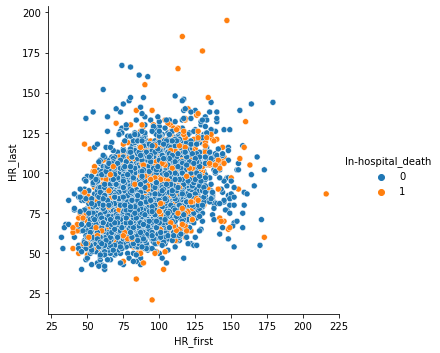

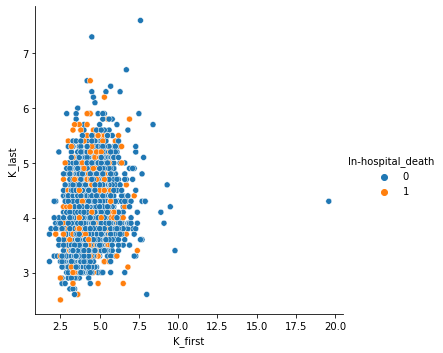

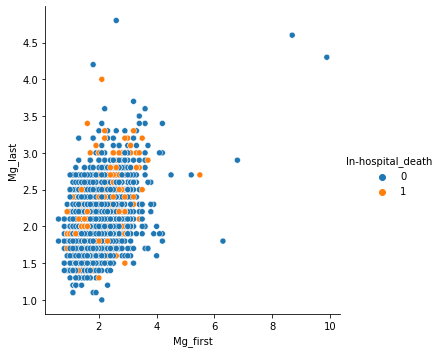

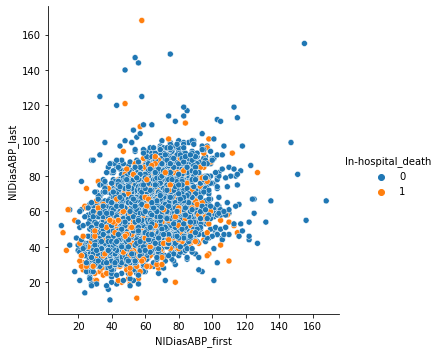

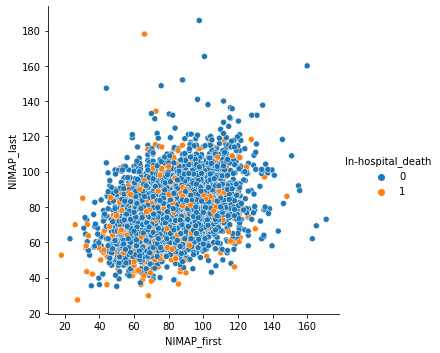

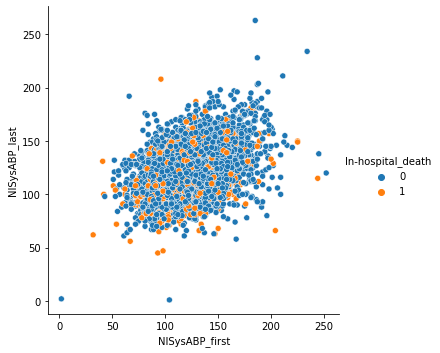

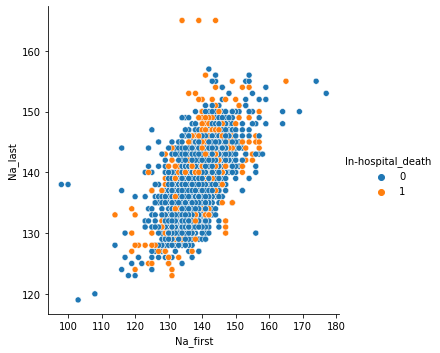

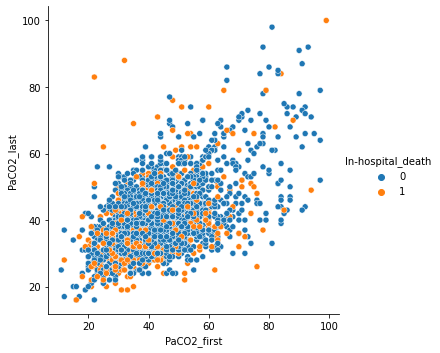

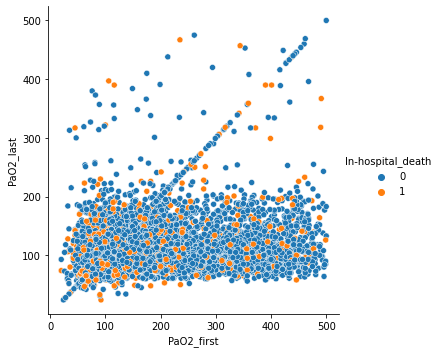

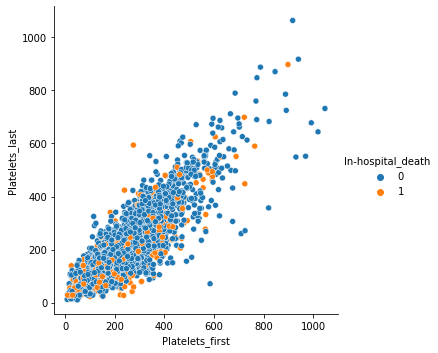

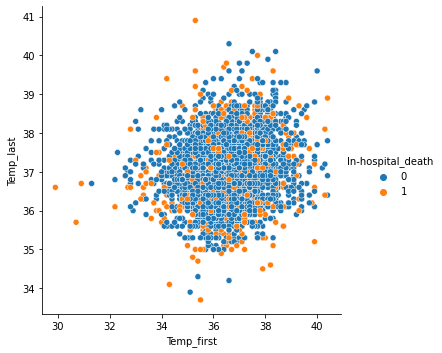

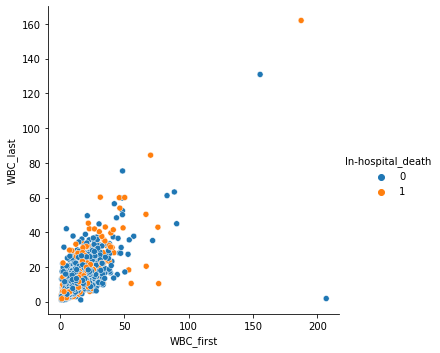

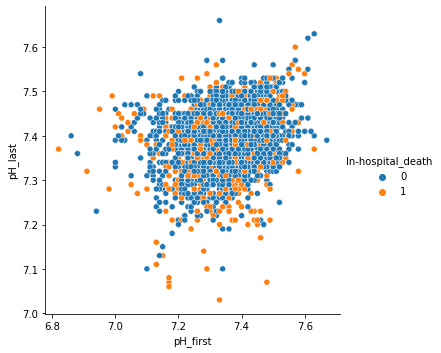

In [19]:
# Bivariate analysis of numerical variables (FIRST AND LAST)

# Interesting plot of LACTATE FIRST and LAST (non c'è se togliamo dropping_missing a 30 OK)
# Anche WEIGHT LAST e FIRST 


fig, ax = plt.subplots(nrows=13, ncols=13, figsize=(10,10))
colonna=0
for c, col in enumerate(col_first): 
    sns.relplot(x = col, y = col_last[c], hue='In-hospital_death',data = df)

#if DROPPING_MISSING_DATA == 30: 
    


In [20]:
# Function to 1) remove highly correlated variables 2) plot the correlation heatmap 

#commento extra
def scremare_highly_correlated(df, threshold): 
    corr = df.corr()
    df_after_corr = df.copy()
    cols = list(corr.columns)
    for c, col in enumerate(corr.columns): 
        pos=list(np.where(corr[col]>threshold)[0])
        pos_uno = list(np.where(corr[col]==1)[0])
        pos.remove(pos_uno[0])
        try: 
            
            cols.remove(np.array(cols)[pos])

        except: 
            print('ok')


    print('Before removing highly correlated columns: ' + str(len(df.columns)))
    print('After removing highly correlated columns: ' + str(len(cols)))

    return df_after_corr

def plot_correlation_heatmap(df):
    plt.figure(figsize=(20,20))
    corr = df.corr()
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True, annot=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,

    );
    
def compute_pearson_corr(df, target): 
    from scipy.stats import pearsonr
    pearson_corr = []
    pvalues=[]
    not_sign_corr=[]
    considered_cols = []
    for col in list(df.columns): 
        df[col].fillna(value=df[col].mean(), inplace=True)
        if df[col].isnull().sum()<1: 
            corr, pval = pearsonr(df[col], target)
            if pval>=0.05:
                not_sign_corr.append(col)
            considered_cols.append(col)
            pearson_corr.append(corr)
            pvalues.append(pval)
            #print('Pearsons correlation: %.3f' % corr)
    print(len(pearson_corr))
    return pearson_corr, pvalues, not_sign_corr

def compute_spear_corr(df, target): 
    from scipy.stats import spearmanr
    pearson_corr = []
    pvalues=[]
    not_sign_corr=[]
    considered_cols = []
    for col in list(df.columns): 
        df[col].fillna(value=df[col].mean(), inplace=True)
        if df[col].isnull().sum()<1: 
            corr, pval = spearmanr(df[col], target)
            if pval>=0.05:
                not_sign_corr.append(col)
            considered_cols.append(col)
            pearson_corr.append(corr)
            pvalues.append(pval)
            #print('Pearsons correlation: %.3f' % corr)
    print(len(pearson_corr))
    return pearson_corr, pvalues, not_sign_corr

def plot_pearson(pearson, pvalues, cols, title): 
    import matplotlib.patches as mpatches
    patches=[]
    colors=['#BADEFC', '#0A86EB']
    label=['Significant association', 'Not significant association']
    fig, ax = plt.subplots(figsize=(20,10))
    for i in range(len(pearson)): 
        if pvalues[i]<0.05: 
            colore=colors[0]# THERE IS STATISTICAL SIGNIFICANT ASSOCIATION BETWEEN THE VARIABLES TOP 
        else: 
            colore=colors[1]# più scuro 
        
        ax.bar(i, pearson[i], color=colore)
        ax.set_xticks(np.arange(len(pearson)), cols, rotation=45)
    ax.grid(axis='x')
    patches = [ mpatches.Patch(color=colors[a], label="{:s}".format(label[a]) ) for a in range(len(label)) ]
    ax.legend(handles=patches)
    plt.title(title)
    

38


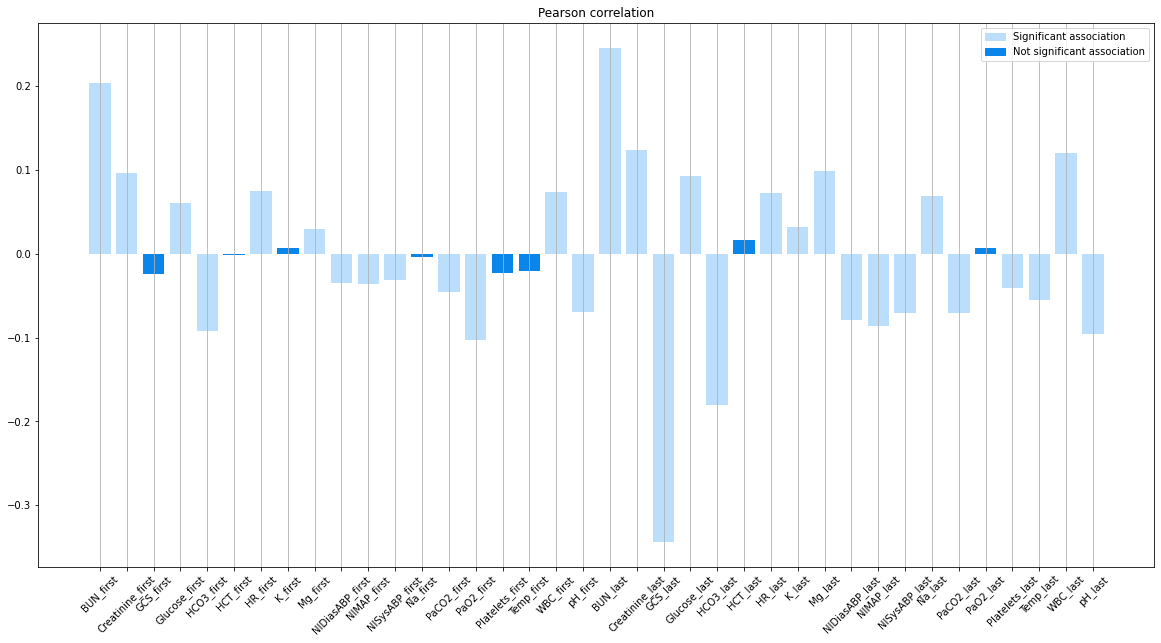

In [21]:
target = np.array(df['In-hospital_death'])
pearson_corr_firstlast, pvalues_firstlast, not_sign_corr_pears = compute_pearson_corr(df_first_last, target)
plot_pearson(pearson_corr_firstlast, pvalues_firstlast , list(df_first_last.columns), 'Pearson correlation')

38


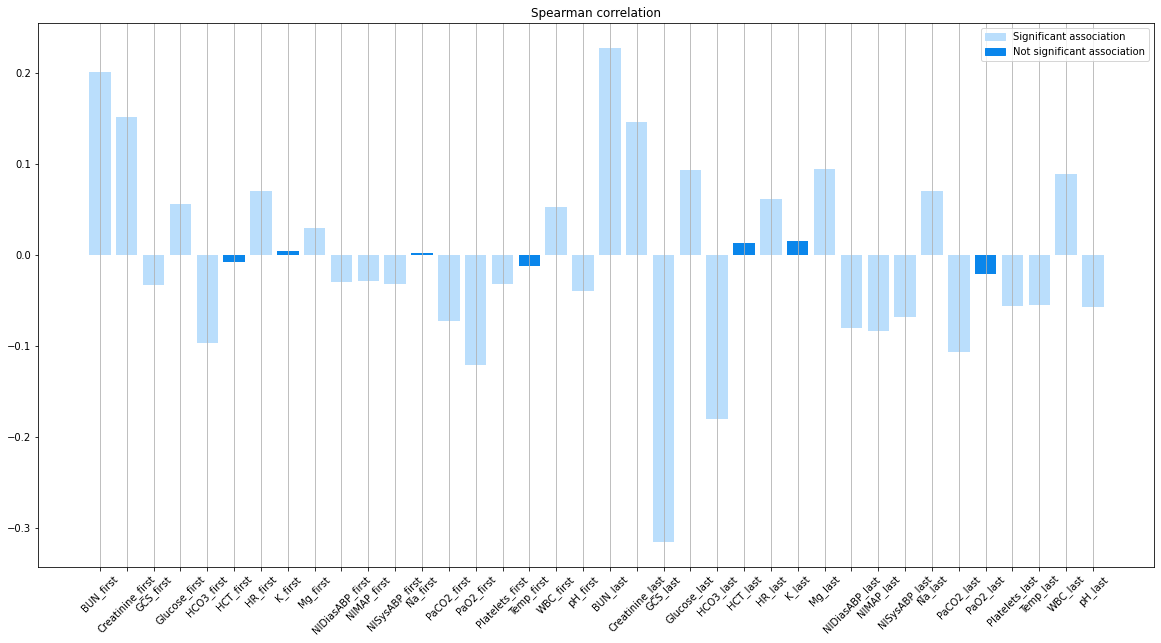

In [22]:
spear_corr_firstlast, spear_pvalues_firstlast, not_sign_corr_spear = compute_spear_corr(df_first_last, target)
plot_pearson(spear_corr_firstlast, spear_pvalues_firstlast , list(df_first_last.columns), 'Spearman correlation')


In [27]:
print(not_sign_corr_spear)
print(not_sign_corr_pears)

both_not_sign_corr = []
for i in range(max(len(not_sign_corr_pears), len(not_sign_corr_spear))):
    if not_sign_corr_pears[i] in not_sign_corr_spear: 
               both_not_sign_corr.append(not_sign_corr_pears[i])
            
print(both_not_sign_corr)
print(len(df_first_last.columns))

['HCT_first', 'K_first', 'Na_first', 'Temp_first', 'HCT_last', 'K_last', 'PaO2_last']
['GCS_first', 'HCT_first', 'K_first', 'Na_first', 'Platelets_first', 'Temp_first', 'HCT_last', 'PaO2_last']
['HCT_first', 'K_first', 'Na_first', 'Temp_first', 'HCT_last', 'PaO2_last']
38


In [25]:
df_first_last_dropped_non_corr = df_first_last.drop(both_not_sign_corr, axis=1)

In [29]:
print(len(df_first_last_dropped_non_corr.columns))

32


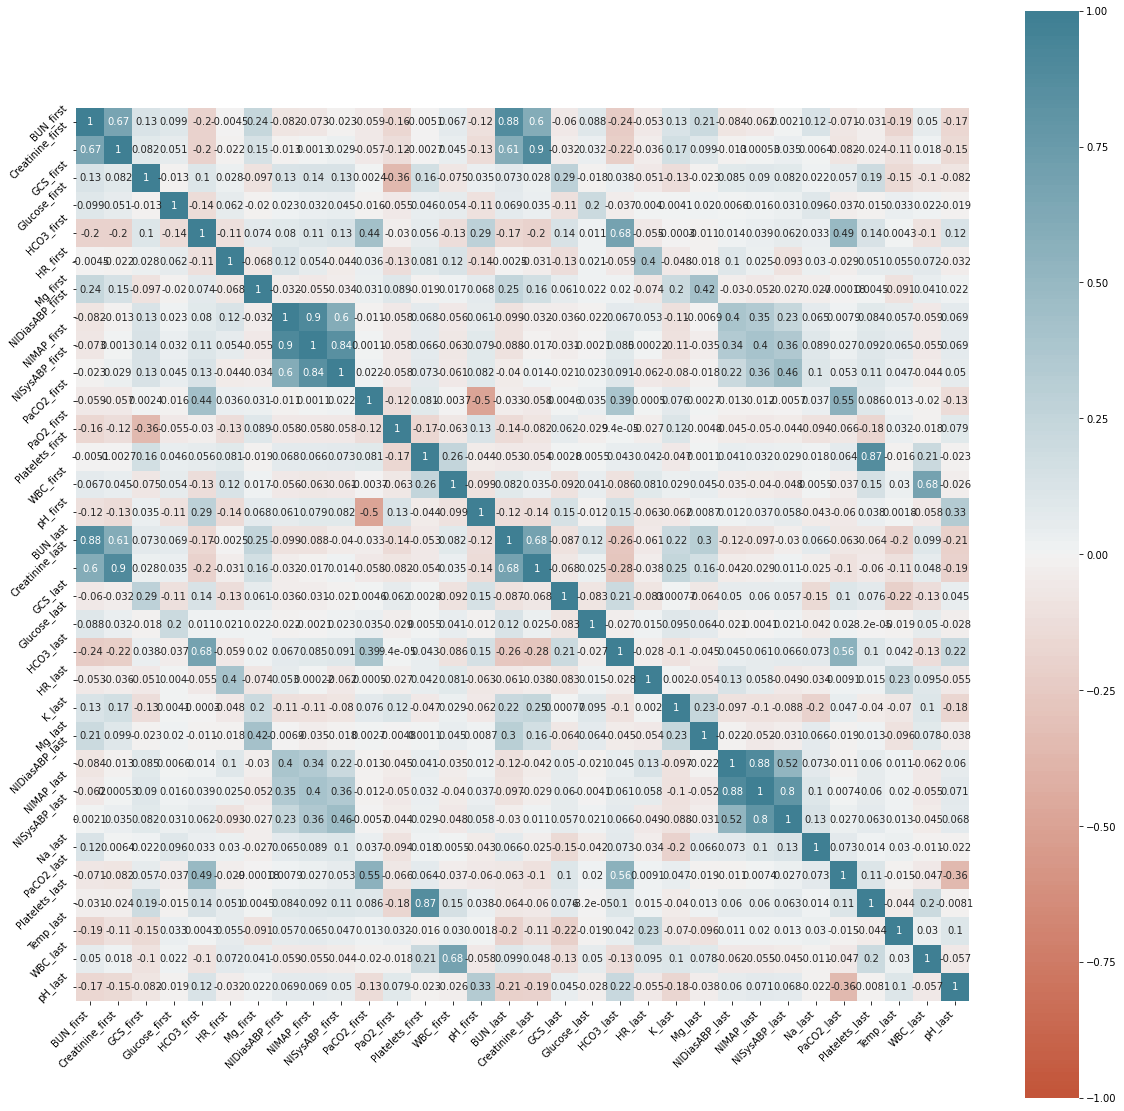

In [30]:
# Heatmap first last 
plot_correlation_heatmap(df_first_last_dropped_non_corr)

/var/folders/km/52y7gmdx3n16d72qd0p8w3b00000gn/T/ipykernel_27863/1998174320.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  cols.remove(np.array(cols)[pos])


ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
Before removing highly correlated columns: 32
After removing highly correlated columns: 23


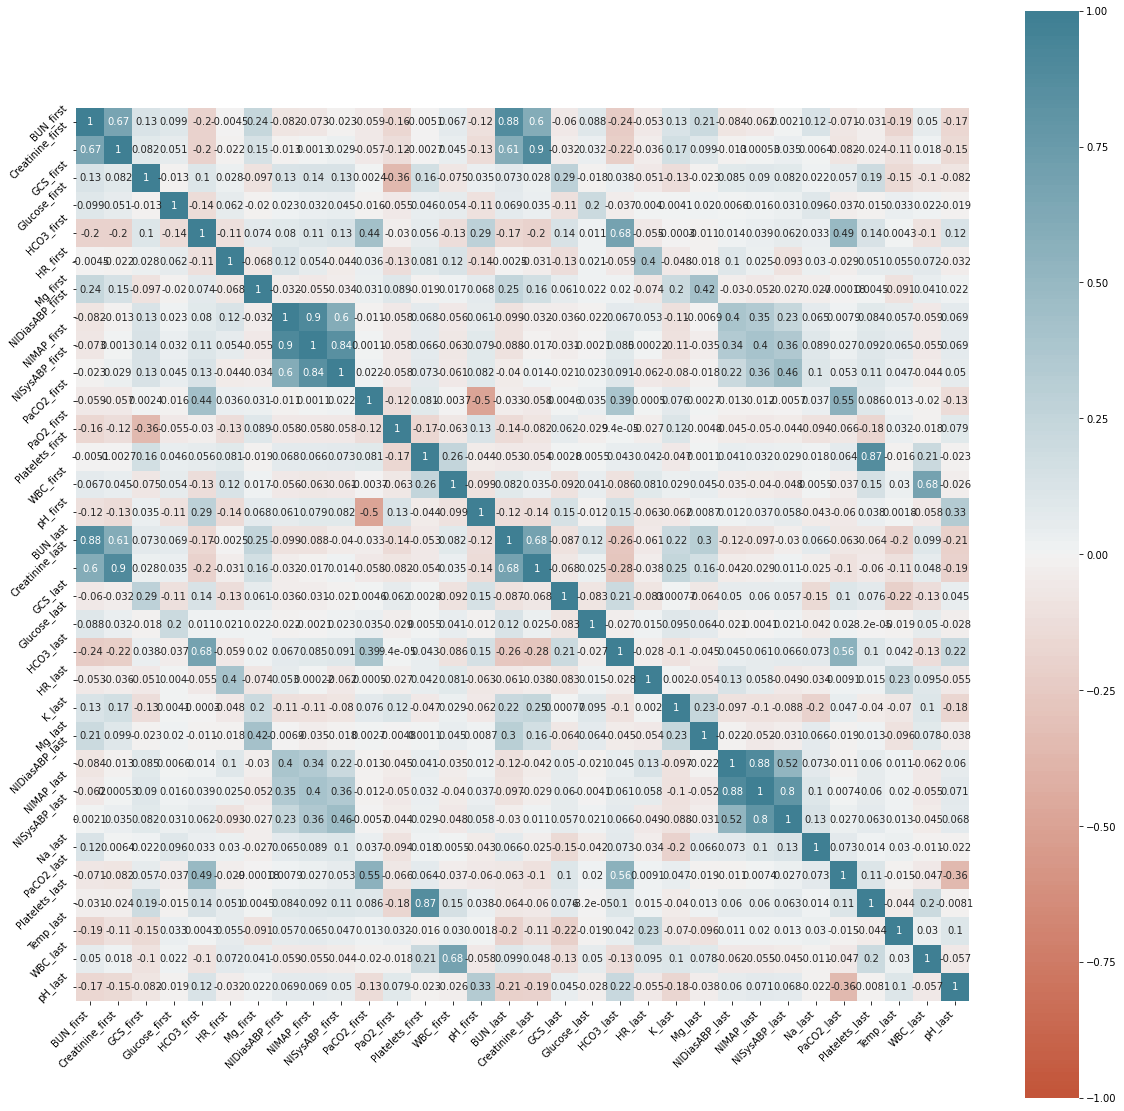

In [31]:
# Codice per rimuovere variabili con più del 0.65 di correlazione - possiamo anche modificare la treshold 
# sempre solamente tra le variabili numeriche con FIRST/LAST 
        
df_after_corr = scremare_highly_correlated(df_first_last_dropped_non_corr, 0.8)
# Correlation between numerical variables that are remained (FIRST/LAST)
plot_correlation_heatmap(df_after_corr)

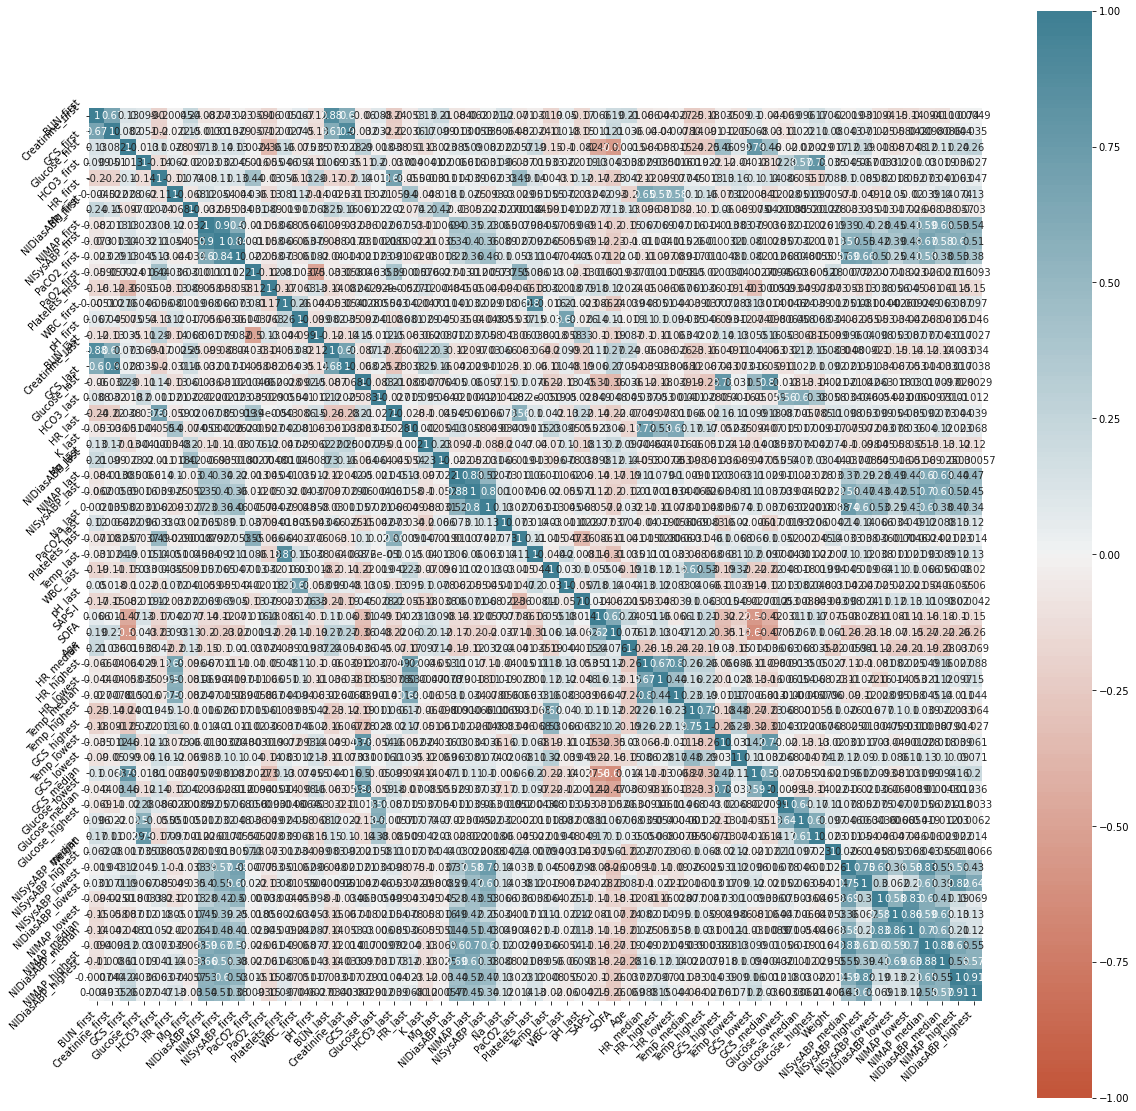

In [32]:
# Uniamo le variabili rimaste FIRST/LAST con le altre numeriche: 
df_numeriche_rimaste = pd.concat([df_after_corr, df_numerical_single], axis=1)

# again mostrare correlazione tra le variabili rimaste
plot_correlation_heatmap(df_numeriche_rimaste)

/var/folders/km/52y7gmdx3n16d72qd0p8w3b00000gn/T/ipykernel_27863/1998174320.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  cols.remove(np.array(cols)[pos])


ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
Before removing highly correlated columns: 57
After removing highly correlated columns: 45


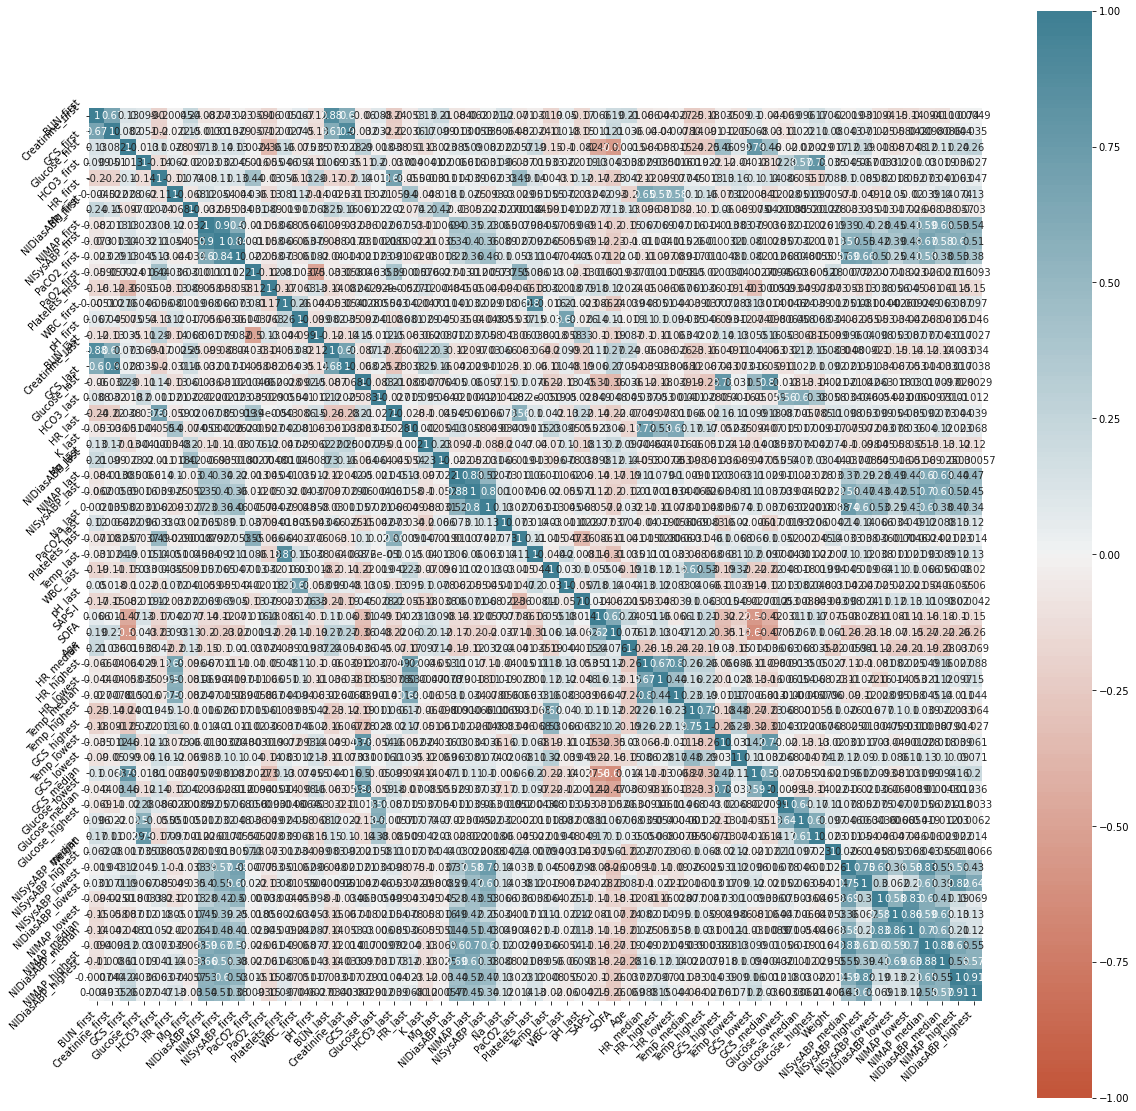

In [33]:
df_after_corr2 = scremare_highly_correlated(df_numeriche_rimaste, 0.8)
plot_correlation_heatmap(df_after_corr2)

In [49]:
df_after_corr2.columns

Index(['BUN_first', 'Creatinine_first', 'GCS_first', 'Glucose_first',
       'HCO3_first', 'HR_first', 'Mg_first', 'NIDiasABP_first', 'NIMAP_first',
       'NISysABP_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first',
       'WBC_first', 'pH_first', 'BUN_last', 'Creatinine_last', 'GCS_last',
       'Glucose_last', 'HCO3_last', 'HR_last', 'K_last', 'Mg_last',
       'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'Na_last',
       'PaCO2_last', 'Platelets_last', 'Temp_last', 'WBC_last', 'pH_last',
       'SAPS-I', 'SOFA', 'Age', 'HR_median', 'HR_highest', 'HR_lowest',
       'Temp_median', 'Temp_highest', 'GCS_highest', 'Temp_lowest',
       'GCS_lowest', 'GCS_median', 'Glucose_lowest', 'Glucose_median',
       'Glucose_highest', 'Weight', 'NISysABP_median', 'NISysABP_highest',
       'NISysABP_lowest', 'NIDiasABP_lowest', 'NIMAP_lowest', 'NIMAP_median',
       'NIDiasABP_median', 'NIMAP_highest', 'NIDiasABP_highest'],
      dtype='object')

In [68]:
'PaO2_first' in df_after_corr2.columns

True

In [71]:
# Differenze 

#df['HCT_diff'] = df['HCT_first'] - df['HCT_last']
df_after_corr2['HR_diff'] = df['HR_first'] - df['HR_last']
df_after_corr2['Temp_diff'] = df['Temp_first'] - df['Temp_last']
df_after_corr2['GCS_diff'] = df['GCS_first'] - df['GCS_last'] # to drop GCS_last
df_after_corr2['Platelets_diff'] = df['Platelets_first'] - df['Platelets_last'] # to drop Platelets_last
df_after_corr2['HCO3_diff'] = df['HCO3_first'] - df['HCO3_last'] # to drop
df_after_corr2['K_diff'] = df['K_first'] - df['K_last']
df_after_corr2['WBC_diff'] = df['WBC_first'] - df['WBC_last'] # to drop
df_after_corr2['Mg_diff'] = df['Mg_first'] - df['Mg_last'] # to drop
df_after_corr2['Glucose_diff'] = df['Glucose_first'] - df['Glucose_last'] # to drop
df_after_corr2['NISysABP_diff'] = df['NISysABP_first'] - df['NISysABP_last']# to drop
df_after_corr2['NIDiasABP_diff'] = df['NIDiasABP_first'] - df['NIDiasABP_last']# to drop
df_after_corr2['pH_diff'] = df['pH_first'] - df['pH_last'] #  to drop
df_after_corr2['PaO2_diff'] = df['PaO2_first'] - df['PaO2_last']
df_after_corr2['PaCO2_diff'] = df['PaCO2_first'] - df['PaCO2_last']# to drop
#df['MAP_diff'] = df['MAP_first'] - df['MAP_last']
#df['SysABP_diff'] = df['SysABP_first'] - df['SysABP_last']
#df['DiasABP_diff'] = df['DiasABP_first'] - df['DiasABP_last']
#df['FiO2_diff'] = df['FiO2_first'] - df['FiO2_last']
#df['Lactate_diff'] = df['Lactate_first'] - df['Lactate_last']

#df = df.drop(['HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'Temp_first', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_first', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_first', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last',  'MAP_first', 'MAP_last', 'SysABP_first', 'SysABP_last', 'DiasABP_first', 'DiasABP_last', 'FiO2_first', 'FiO2_last', 'Lactate_first', 'Lactate_last' ], axis=1)
df_after_corr2_dropping = df_after_corr2.drop([ 'HR_first', 'HR_last', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaCO2_first', 'PaCO2_last'], axis=1)
df_after_corr2_dropping

BUN_first  Creatinine_first  NIMAP_first  Platelets_first  BUN_last  \
0          13.0               0.8    92.330000            221.0       8.0   
1          16.0               0.8    49.330000            164.0      21.0   
2           8.0               0.4   100.300000             72.0       3.0   
3          23.0               0.9    86.670000            391.0      10.0   
4          45.0               1.0    75.330000            109.0      25.0   
...         ...               ...          ...              ...       ...   
5995       11.0               0.6    79.479458            253.0       9.0   
5996       20.0               0.7    98.670000            364.0      23.0   
5997       62.0               2.6    90.330000            155.0      67.0   
5998       16.0               1.1    92.000000             30.0      25.0   
5999       14.0               0.9    68.670000            218.0      23.0   

      Creatinine_last  NIMAP_last  Na_last  SAPS-I  SOFA  ...  HCO3_diff  \
0                 0.7   79.330000    136.0       6     1  ...       -2.0   
1                 1.3   68.330000    135.0      16     8  ...       -3.0   
2                 0.3  103.000000    138.0      21    11  ...       -1.0   
3                 0.7   98.670000    137.0       7     1  ...        0.0   
4                 1.0   73.000000    139.0      17     2  ...       -2.0   
...               ...         ...      ...     ...   ...  ...        ...   
5995              0.6   77.053711    140.0      19     6  ...       -1.0   
5996              0.7   89.000000    129.0      13     2  ...        1.0   
5997              2.8   83.670000    144.0      12     9  ...       -4.0   
5998              1.0   58.330000    134.0      18    11  ...       -7.0   
5999              1.3   68.670000    136.0      19     9  ...        1.0   

      K_diff  WBC_diff  Mg_diff  Glucose_diff  NISysABP_diff  NIDiasABP_diff  \
0        0.4       1.8     -0.4          90.0           19.0            10.0   
1        0.8      -5.9      1.2         -41.0          -35.0           -11.0   
2       -0.4      -2.0      0.2          -2.0           -8.0             0.0   
3        0.2       3.6      0.2          12.0            0.0           -18.0   
4        1.9      -1.0     -0.1          21.0            9.0            -1.0   
...      ...       ...      ...           ...            ...             ...   
5995     0.7       3.0     -0.4           1.0            NaN             NaN   
5996    -0.9       0.3      0.2          34.0           19.0             5.0   
5997     0.6      -3.1      0.1          11.0           -4.0            12.0   
5998    -0.9      -2.7     -0.6         -13.0           41.0            30.0   
5999     0.8      -0.6      0.6           0.0            0.0             0.0   

      pH_diff  PaO2_diff  PaCO2_diff  
0         NaN        NaN         NaN  
1        0.08      204.0       -12.0  
2        0.04     -108.0         0.0  
3         NaN        NaN         NaN  
4         NaN        NaN         NaN  
...       ...        ...         ...  
5995    -0.03      249.0         5.0  
5996      NaN        NaN         NaN  
5997    -0.12      -43.0        24.0  
5998    -0.06        8.0        -9.0  
5999    -0.11      299.0        13.0  

[6000 rows x 47 columns]

In [90]:
# all df numeriche 
df_after_corr2.columns

Index(['BUN_first', 'Creatinine_first', 'GCS_first', 'Glucose_first',
       'HCO3_first', 'HR_first', 'Mg_first', 'NIDiasABP_first', 'NIMAP_first',
       'NISysABP_first', 'PaCO2_first', 'PaO2_first', 'Platelets_first',
       'WBC_first', 'pH_first', 'BUN_last', 'Creatinine_last', 'GCS_last',
       'Glucose_last', 'HCO3_last', 'HR_last', 'K_last', 'Mg_last',
       'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last', 'Na_last',
       'PaCO2_last', 'Platelets_last', 'Temp_last', 'WBC_last', 'pH_last',
       'SAPS-I', 'SOFA', 'Age', 'HR_median', 'HR_highest', 'HR_lowest',
       'Temp_median', 'Temp_highest', 'GCS_highest', 'Temp_lowest',
       'GCS_lowest', 'GCS_median', 'Glucose_lowest', 'Glucose_median',
       'Glucose_highest', 'Weight', 'NISysABP_median', 'NISysABP_highest',
       'NISysABP_lowest', 'NIDiasABP_lowest', 'NIMAP_lowest', 'NIMAP_median',
       'NIDiasABP_median', 'NIMAP_highest', 'NIDiasABP_highest', 'HR_diff',
       'Temp_diff', 'GCS_diff', 'Platelets_diff', 'HC

In [91]:
mean_values =df_after_corr2.mean()
mean_values

BUN_first            25.920888
Creatinine_first      1.365916
GCS_first            10.111601
Glucose_first       148.760226
HCO3_first           23.172584
                       ...    
NISysABP_diff         2.054178
NIDiasABP_diff        2.744559
pH_diff              -0.029230
PaO2_diff            86.523344
PaCO2_diff            1.379640
Length: 71, dtype: float64

In [92]:
df_after_corr2 = df_after_corr2.fillna(value=mean_values)
df_after_corr2.isnull().sum()


BUN_first           0
Creatinine_first    0
GCS_first           0
Glucose_first       0
HCO3_first          0
                   ..
NISysABP_diff       0
NIDiasABP_diff      0
pH_diff             0
PaO2_diff           0
PaCO2_diff          0
Length: 71, dtype: int64

In [93]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(df_after_corr2)
scaled_df=pd.DataFrame(scaler.transform(df_after_corr2))
scaled_df.columns = df_after_corr2.columns

scaled_df

BUN_first  Creatinine_first  GCS_first  Glucose_first  HCO3_first  \
0     -0.601078         -0.381407   1.007583       0.744846    0.611060   
1     -0.461518         -0.381407  -1.465824      -0.579565   -0.469538   
2     -0.833677         -0.650993  -0.641355      -0.102777    0.178821   
3     -0.135879         -0.314011   1.007583      -0.261707    1.043299   
4      0.887557         -0.246614   1.007583      -0.473613   -1.117896   
...         ...               ...        ...            ...         ...   
5995  -0.694117         -0.516200  -1.053589      -0.394148   -0.253418   
5996  -0.275439         -0.448803   1.007583       0.056152    1.691657   
5997   1.678394          0.831729   1.007583      -0.288195    2.123896   
5998  -0.461518         -0.179218  -0.847472      -1.374212   -2.198494   
5999  -0.554558         -0.314011  -0.023003       0.135617    1.043299   

      HR_first  Mg_first  NIDiasABP_first  NIMAP_first  NISysABP_first  ...  \
0    -0.830721 -0.931192     2.833494e-01     0.778279        1.053226  ...   
1    -0.078286  2.485464    -1.417469e+00    -1.825970       -2.049511  ...   
2     0.523662 -0.077028     1.480221e+00     1.260974        0.474048  ...   
3    -0.529747  0.350054     1.573629e-01     0.435488        0.515418  ...   
4     0.172525 -0.931192    -1.228489e+00    -0.251308        0.929116  ...   
...        ...       ...              ...          ...             ...  ...   
5995 -1.081533 -0.717651     4.475940e-16     0.000000        0.000000  ...   
5996 -0.078286  0.563595     1.228248e+00     1.162255        0.598158  ...   
5997  0.674149 -0.290569     1.573629e-01     0.657152        0.970486  ...   
5998  2.680642 -0.931192     8.502887e-01     0.758293        0.267199  ...   
5999  0.272850  1.631300    -1.102502e+00    -0.654663       -0.063759  ...   

      HCO3_diff    K_diff  WBC_diff   Mg_diff  Glucose_diff  NISysABP_diff  \
0     -0.258884  0.379723  0.205010 -0.660524      0.886376       0.720286   
1     -0.539712  0.910746 -1.120432  2.974703     -0.782126      -1.574997   
2      0.021943 -0.682324 -0.449104  0.702686     -0.285397      -0.427355   
3      0.302771  0.114211  0.514854  0.702686     -0.107083      -0.087313   
4     -0.258884  2.371061 -0.276969  0.021081      0.007547       0.295234   
...         ...       ...       ...       ...           ...            ...   
5995   0.021943  0.777991  0.411573 -0.660524     -0.247187       0.000000   
5996   0.583599 -1.346103 -0.053193  0.702686      0.173123       0.720286   
5997  -0.820540  0.645235 -0.638453  0.475485     -0.119820      -0.257334   
5998  -1.663024 -1.346103 -0.569599 -1.114927     -0.425500       1.655402   
5999   0.583599  0.910746 -0.208115  1.611493     -0.259923      -0.087313   

      NIDiasABP_diff       pH_diff     PaO2_diff    PaCO2_diff  
0       4.397396e-01 -8.646334e-17  1.318287e-16  2.766267e-17  
1      -8.330336e-01  1.361086e+00  1.089787e+00 -1.666857e+00  
2      -1.663429e-01  8.626583e-01 -1.804519e+00 -1.718778e-01  
3      -1.257291e+00 -8.646334e-17  1.318287e-16  2.766267e-17  
4      -2.269512e-01 -8.646334e-17  1.318287e-16  2.766267e-17  
...              ...           ...           ...           ...  
5995   -2.691547e-17 -9.589378e-03  1.507234e+00  4.510303e-01  
5996    1.366983e-01 -8.646334e-17  1.318287e-16  2.766267e-17  
5997    5.609560e-01 -1.131051e+00 -1.201539e+00  2.818081e+00  
5998    1.651904e+00 -3.834098e-01 -7.284314e-01 -1.293112e+00  
5999   -1.663429e-01 -1.006444e+00  1.971066e+00  1.447683e+00  

[6000 rows x 71 columns]

In [94]:
#concatenating with categorical
print(len(categorical_df.columns))
print(len(df_after_corr2.columns))
print(len(df_after_corr2))
print(len(categorical_df))
final_df = pd.concat([categorical_df, df_after_corr2], axis=1)
final_df

5
71
6000
6000


In-hospital_death  CCU  CSRU  SICU  Gender  BUN_first  Creatinine_first  \
0                     0    0     0     1     0.0       13.0               0.8   
1                     0    0     1     0     1.0       16.0               0.8   
2                     0    0     0     0     0.0        8.0               0.4   
3                     0    0     0     0     1.0       23.0               0.9   
4                     0    0     0     0     0.0       45.0               1.0   
...                 ...  ...   ...   ...     ...        ...               ...   
5995                  1    0     0     1     1.0       11.0               0.6   
5996                  0    1     0     0     0.0       20.0               0.7   
5997                  0    1     0     0     0.0       62.0               2.6   
5998                  1    0     0     0     1.0       16.0               1.1   
5999                  0    0     1     0     1.0       14.0               0.9   

      GCS_first  Glucose_first  HCO3_first  ...  HCO3_diff  K_diff  WBC_diff  \
0          15.0          205.0        26.0  ...       -2.0     0.4       1.8   
1           3.0          105.0        21.0  ...       -3.0     0.8      -5.9   
2           7.0          141.0        24.0  ...       -1.0    -0.4      -2.0   
3          15.0          129.0        28.0  ...        0.0     0.2       3.6   
4          15.0          113.0        18.0  ...       -2.0     1.9      -1.0   
...         ...            ...         ...  ...        ...     ...       ...   
5995        5.0          119.0        22.0  ...       -1.0     0.7       3.0   
5996       15.0          153.0        31.0  ...        1.0    -0.9       0.3   
5997       15.0          127.0        33.0  ...       -4.0     0.6      -3.1   
5998        6.0           45.0        13.0  ...       -7.0    -0.9      -2.7   
5999       10.0          159.0        28.0  ...        1.0     0.8      -0.6   

      Mg_diff  Glucose_diff  NISysABP_diff  NIDiasABP_diff  pH_diff  \
0        -0.4          90.0      19.000000       10.000000 -0.02923   
1         1.2         -41.0     -35.000000      -11.000000  0.08000   
2         0.2          -2.0      -8.000000        0.000000  0.04000   
3         0.2          12.0       0.000000      -18.000000 -0.02923   
4        -0.1          21.0       9.000000       -1.000000 -0.02923   
...       ...           ...            ...             ...      ...   
5995     -0.4           1.0       2.054178        2.744559 -0.03000   
5996      0.2          34.0      19.000000        5.000000 -0.02923   
5997      0.1          11.0      -4.000000       12.000000 -0.12000   
5998     -0.6         -13.0      41.000000       30.000000 -0.06000   
5999      0.6           0.0       0.000000        0.000000 -0.11000   

       PaO2_diff  PaCO2_diff  
0      86.523344     1.37964  
1     204.000000   -12.00000  
2    -108.000000     0.00000  
3      86.523344     1.37964  
4      86.523344     1.37964  
...          ...         ...  
5995  249.000000     5.00000  
5996   86.523344     1.37964  
5997  -43.000000    24.00000  
5998    8.000000    -9.00000  
5999  299.000000    13.00000  

[6000 rows x 76 columns]

/Users/saracaramaschi/GitHub/Metro/teo/NLPLab/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

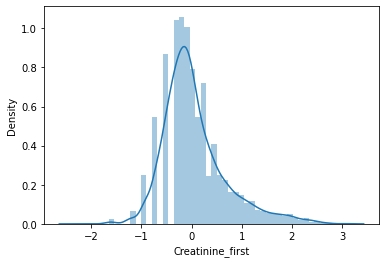

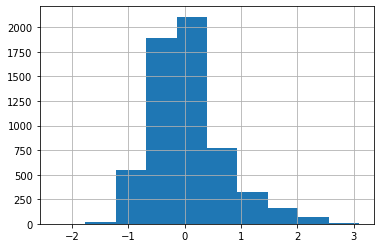

In [95]:
crea_log= np.log(numerical_df['Creatinine_first'])
sns.distplot(crea_log)
fig = plt.figure()
crea_log.hist()

In [96]:
final_df['Creatinine_first'] = crea_log
final_df.rename(columns = {'Creatinine_first':'Crea_first_log'}, inplace = True)

In [97]:
#tolgo 6 righe con genere nan
indexNames =final_df[final_df['Gender'].isnull()].index
final_df.drop(indexNames , inplace=True)
final_df

In-hospital_death  CCU  CSRU  SICU  Gender  BUN_first  Crea_first_log  \
0                     0    0     0     1     0.0       13.0       -0.223144   
1                     0    0     1     0     1.0       16.0       -0.223144   
2                     0    0     0     0     0.0        8.0       -0.916291   
3                     0    0     0     0     1.0       23.0       -0.105361   
4                     0    0     0     0     0.0       45.0        0.000000   
...                 ...  ...   ...   ...     ...        ...             ...   
5995                  1    0     0     1     1.0       11.0       -0.510826   
5996                  0    1     0     0     0.0       20.0       -0.356675   
5997                  0    1     0     0     0.0       62.0        0.955511   
5998                  1    0     0     0     1.0       16.0        0.095310   
5999                  0    0     1     0     1.0       14.0       -0.105361   

      GCS_first  Glucose_first  HCO3_first  ...  HCO3_diff  K_diff  WBC_diff  \
0          15.0          205.0        26.0  ...       -2.0     0.4       1.8   
1           3.0          105.0        21.0  ...       -3.0     0.8      -5.9   
2           7.0          141.0        24.0  ...       -1.0    -0.4      -2.0   
3          15.0          129.0        28.0  ...        0.0     0.2       3.6   
4          15.0          113.0        18.0  ...       -2.0     1.9      -1.0   
...         ...            ...         ...  ...        ...     ...       ...   
5995        5.0          119.0        22.0  ...       -1.0     0.7       3.0   
5996       15.0          153.0        31.0  ...        1.0    -0.9       0.3   
5997       15.0          127.0        33.0  ...       -4.0     0.6      -3.1   
5998        6.0           45.0        13.0  ...       -7.0    -0.9      -2.7   
5999       10.0          159.0        28.0  ...        1.0     0.8      -0.6   

      Mg_diff  Glucose_diff  NISysABP_diff  NIDiasABP_diff  pH_diff  \
0        -0.4          90.0      19.000000       10.000000 -0.02923   
1         1.2         -41.0     -35.000000      -11.000000  0.08000   
2         0.2          -2.0      -8.000000        0.000000  0.04000   
3         0.2          12.0       0.000000      -18.000000 -0.02923   
4        -0.1          21.0       9.000000       -1.000000 -0.02923   
...       ...           ...            ...             ...      ...   
5995     -0.4           1.0       2.054178        2.744559 -0.03000   
5996      0.2          34.0      19.000000        5.000000 -0.02923   
5997      0.1          11.0      -4.000000       12.000000 -0.12000   
5998     -0.6         -13.0      41.000000       30.000000 -0.06000   
5999      0.6           0.0       0.000000        0.000000 -0.11000   

       PaO2_diff  PaCO2_diff  
0      86.523344     1.37964  
1     204.000000   -12.00000  
2    -108.000000     0.00000  
3      86.523344     1.37964  
4      86.523344     1.37964  
...          ...         ...  
5995  249.000000     5.00000  
5996   86.523344     1.37964  
5997  -43.000000    24.00000  
5998    8.000000    -9.00000  
5999  299.000000    13.00000  

[5994 rows x 76 columns]

# Differenze 

#df['HCT_diff'] = df['HCT_first'] - df['HCT_last']
df['HR_diff'] = df['HR_first'] - df['HR_last']
df['Temp_diff'] = df['Temp_first'] - df['Temp_last']
df['GCS_diff'] = df['GCS_first'] - df['GCS_last'] # to drop GCS_last
df['Platelets_diff'] = df['Platelets_first'] - df['Platelets_last'] # to drop Platelets_last
df['HCO3_diff'] = df['HCO3_first'] - df['HCO3_last'] # to drop
df['K_diff'] = df['K_first'] - df['K_last']
df['WBC_diff'] = df['WBC_first'] - df['WBC_last'] # to drop
df['Mg_diff'] = df['Mg_first'] - df['Mg_last'] # to drop
df['Glucose_diff'] = df['Glucose_first'] - df['Glucose_last'] # to drop
df['NISysABP_diff'] = df['NISysABP_first'] - df['NISysABP_last']# to drop
df['NIDiasABP_diff'] = df['NIDiasABP_first'] - df['NIDiasABP_last']# to drop
df['pH_diff'] = df['pH_first'] - df['pH_last'] #  to drop
df['PaO2_diff'] = df['PaO2_first'] - df['PaO2_last']
df['PaCO2_diff'] = df['PaCO2_first'] - df['PaCO2_last']# to drop
#df['MAP_diff'] = df['MAP_first'] - df['MAP_last']
#df['SysABP_diff'] = df['SysABP_first'] - df['SysABP_last']
#df['DiasABP_diff'] = df['DiasABP_first'] - df['DiasABP_last']
#df['FiO2_diff'] = df['FiO2_first'] - df['FiO2_last']
#df['Lactate_diff'] = df['Lactate_first'] - df['Lactate_last']

#df = df.drop(['HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'Temp_first', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_first', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_first', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last',  'MAP_first', 'MAP_last', 'SysABP_first', 'SysABP_last', 'DiasABP_first', 'DiasABP_last', 'FiO2_first', 'FiO2_last', 'Lactate_first', 'Lactate_last' ], axis=1)
df = df.drop(['HCT_first', 'HCT_last', 'HR_first', 'HR_last', 'Temp_first', 'Temp_last', 'GCS_first', 'GCS_last', 'Platelets_first', 'Platelets_last', 'HCO3_first', 'HCO3_last', 'K_first', 'K_last', 'WBC_first', 'WBC_last', 'Mg_first', 'Mg_last', 'Glucose_first', 'Glucose_last', 'NISysABP_first', 'NISysABP_last', 'NIDiasABP_first', 'NIDiasABP_last', 'pH_first', 'pH_last', 'PaO2_first', 'PaO2_last', 'PaCO2_first', 'PaCO2_last'], axis=1)
df

In [100]:
# Missing data exploration 

# print(df[df.columns[df.isna().any()]])
percent_missing = final_df.isnull().sum() * 100 / len(final_df)
missing_value_df = pd.DataFrame({'column_name': final_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
print(missing_value_df[percent_missing>0])
#print(df[df.columns[df.isna().any()]].isna().sum())

                   column_name  percent_missing
Crea_first_log  Crea_first_log         1.618285


/var/folders/km/52y7gmdx3n16d72qd0p8w3b00000gn/T/ipykernel_27863/2867594910.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(missing_value_df[percent_missing>0])


In [105]:
final_df.drop('Crea_first_log', axis=1, inplace=True)

In [106]:
final_df.columns

Index(['In-hospital_death', 'CCU', 'CSRU', 'SICU', 'Gender', 'BUN_first',
       'GCS_first', 'Glucose_first', 'HCO3_first', 'HR_first', 'Mg_first',
       'NIDiasABP_first', 'NIMAP_first', 'NISysABP_first', 'PaCO2_first',
       'PaO2_first', 'Platelets_first', 'WBC_first', 'pH_first', 'BUN_last',
       'Creatinine_last', 'GCS_last', 'Glucose_last', 'HCO3_last', 'HR_last',
       'K_last', 'Mg_last', 'NIDiasABP_last', 'NIMAP_last', 'NISysABP_last',
       'Na_last', 'PaCO2_last', 'Platelets_last', 'Temp_last', 'WBC_last',
       'pH_last', 'SAPS-I', 'SOFA', 'Age', 'HR_median', 'HR_highest',
       'HR_lowest', 'Temp_median', 'Temp_highest', 'GCS_highest',
       'Temp_lowest', 'GCS_lowest', 'GCS_median', 'Glucose_lowest',
       'Glucose_median', 'Glucose_highest', 'Weight', 'NISysABP_median',
       'NISysABP_highest', 'NISysABP_lowest', 'NIDiasABP_lowest',
       'NIMAP_lowest', 'NIMAP_median', 'NIDiasABP_median', 'NIMAP_highest',
       'NIDiasABP_highest', 'HR_diff', 'Temp_diff',

In [107]:
final_df.to_csv('df_sara.csv', index=False)